# <span style="color:orange"> Exercise 5 </span>

## <span style="color:green"> Task
    
Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.
    
<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

## <span style="color:green"> Solution </span>
The simulation is made up of various files: the main.cpp file starts by defining the parameters, such as the type of wavefunction and the transition probability to be used. The file then initializes the Metropolis class and starts the simulation using the run() function.<br>
The metropolis.hpp file contains the class for the Metropolis algorithm, made up of methods such as ```make_pass``` to perform a step with the algorithm, ```equilibrate``` in order to bring the system to equilibrium, ```run``` to compute the simulation, and more...<br>
The functions.hpp holds the definition for a quantum wavefunction, defined by the quantic numbers n,l and m. The class has the ```eval``` method which computes the squared-modulus of the wavefunction at position $(x,y,z)$.



In [2]:
try:
    from matplotlib import pyplot as plt
    import sys,os
    import numpy as np
    from scipy.optimize import curve_fit
    from statistics import mean
    from rich.console import Console
    print("Ex5: Imports completed")
except Exception as e:
    print("Ex5: Unable to import a package")
    print(e)
    
c = Console()

Ex5: Imports completed


In [3]:
# Functions
def read_orbital(orbital:str):
    filename = "results_"+orbital+".dat"
    return [item for item in open(filename,"r+").read().split("\n") if len(item) > 0]
    # list of len3 lists with j,ave_r,error_r

def parse_file():
    pass



expected_values = {
    "1s" : 1.5,
    "2p" : 5.0
}
samplings = ("normal","gauss")
configs = ("1s","2p")

### Different starting positions
The behaviour of the average distance of a particle with quantum wavefunctions $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ should not depend on its initial position after some time. To prove this, the same simulations have been executed for different values of the starting position. The values for $(x_0,y_0,z_0)$ are:
- (0,0,0)
- (1,1,1)
- (2,2,2)
- (3,3,3)
- (4,4,4)
- (10,0,-10)

The first 5 values have been chosen in order to spot eventual trends with a small variation of the starting position of the quantum particle, while the last value has been chosen significantly far from the origin to prove that the average distance of the particle is totally uncorrelated from its starting position.

----- normal -----

-- 1s --

Starting pos: ( 0.0 , 0.0 , 0.0 )	final value:  1.51712 	uncertainty:  0.0171
Starting pos: ( 1.0 , 1.0 , 1.0 )	final value:  1.50572 	uncertainty:  0.0057
Starting pos: ( 2.0 , 2.0 , 2.0 )	final value:  1.51614 	uncertainty:  0.0161
Starting pos: ( 3.0 , 3.0 , 3.0 )	final value:  1.51771 	uncertainty:  0.0177
Starting pos: ( 4.0 , 4.0 , 4.0 )	final value:  1.50582 	uncertainty:  0.0058
Starting pos: ( 10.0 , 0.0 , -10.0 )	final value:  1.52293 	uncertainty:  0.0229


-- 2p --

Starting pos: ( 0.0 , 0.0 , 0.0 )	final value:  5.06237 	uncertainty:  0.0624
Starting pos: ( 1.0 , 1.0 , 1.0 )	final value:  5.07762 	uncertainty:  0.0776
Starting pos: ( 2.0 , 2.0 , 2.0 )	final value:  5.01297 	uncertainty:  0.0130
Starting pos: ( 3.0 , 3.0 , 3.0 )	final value:  5.05196 	uncertainty:  0.0520
Starting pos: ( 4.0 , 4.0 , 4.0 )	final value:  5.05146 	uncertainty:  0.0515
Starting pos: ( 10.0 , 0.0 , -10.0 )	final value:  5.03355 	uncertainty:  0.0335




----- gauss -----

-- 1s --

Starting pos: ( 0.0 , 0.0 , 0.0 )	final value:  1.48524 	uncertainty:  0.0148
Starting pos: ( 1.0 , 1.0 , 1.0 )	final value:  1.48521 	uncertainty:  0.0148
Starting pos: ( 2.0 , 2.0 , 2.0 )	final value:  1.47463 	uncertainty:  0.0254
Starting pos: ( 3.0 , 3.0 , 3.0 )	final value:  1.48702 	uncertainty:  0.0130
Starting pos: ( 4.0 , 4.0 , 4.0 )	final value:  1.48506 	uncertainty:  0.0149
Starting pos: ( 10.0 , 0.0 , -10.0 )	final value:  1.49325 	uncertainty:  0.0068


-- 2p --

Starting pos: ( 0.0 , 0.0 , 0.0 )	final value:  4.97619 	uncertainty:  0.0238
Starting pos: ( 1.0 , 1.0 , 1.0 )	final value:  4.9682 	uncertainty:  0.0318
Starting pos: ( 2.0 , 2.0 , 2.0 )	final value:  5.00112 	uncertainty:  0.0011
Starting pos: ( 3.0 , 3.0 , 3.0 )	final value:  5.0176 	uncertainty:  0.0176
Starting pos: ( 4.0 , 4.0 , 4.0 )	final value:  5.004 	uncertainty:  0.0040
Starting pos: ( 10.0 , 0.0 , -10.0 )	final value:  5.00022 	uncertainty:  0.0002




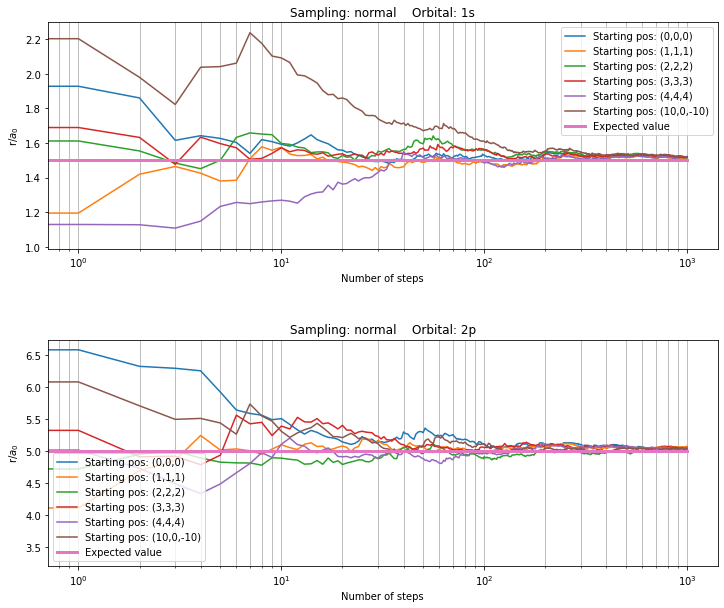

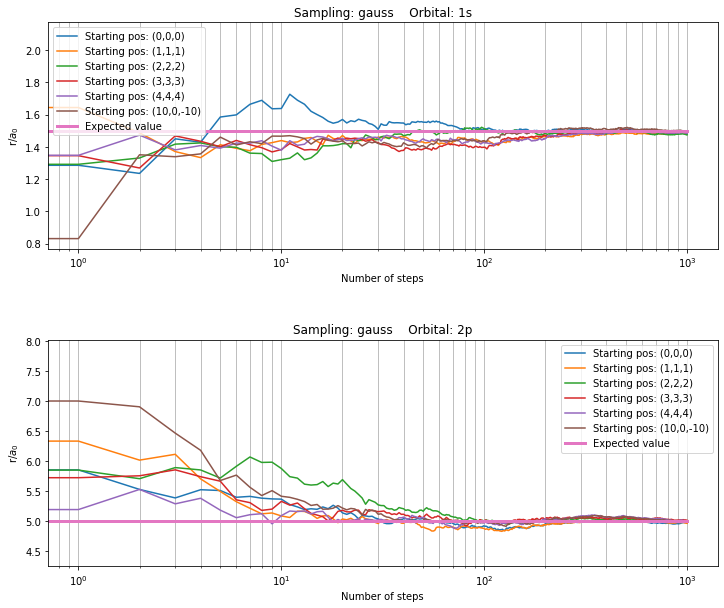

In [4]:

for i1, sample in enumerate(samplings):
    fig, ax = plt.subplots(2,1,figsize=(12,10),gridspec_kw={'hspace': 0.4})
    c.print(f"----- {sample} -----",style = "bold blue on white")
    basedir = "results/"+sample+"/"
    for i2, config in enumerate(configs):
        ax[i2].set_title("Sampling: "+sample+"    Orbital: "+config)
        c.print(f"-- {config} --",style = "bold green on white")
        for file in os.listdir(basedir):
            if file.startswith(f"data_{config}_"):
                i, y, err = np.loadtxt(basedir+file,unpack=True,delimiter="\t")
                x0, y0, z0 = i[0], y[0], err[0]
                i, y, err = i[1:], y[1:], err[1:]
                ax[i2].plot(y,label=f"Starting pos: ({int(x0)},{int(y0)},{int(z0)})")
                ax[i2].set_xscale("log")
                print("Starting pos: (",x0,",",y0,",",z0,")\tfinal value: ",y[-1], "\tuncertainty: ",  "{:.4f}".format(abs(y[-1] - expected_values[config])) )
        ax[i2].plot([expected_values[config] for index in range(len(i))],label="Expected value", linewidth=3)
        ax[i2].legend()
        ax[i2].set_xlabel("Number of steps")
        ax[i2].set_ylabel("r/$a_0$")
        ax[i2].grid (True, axis='x', which="both")
    print("\n")

Clearly, the time for equilibration increases as the starting position of the quantum particle gets farther from the origin, but equilibrium is eventually reached. 

Below a plot shows how the acceptance varies with the number of Metropolis steps, showing that it always converges between 40% and 60%.

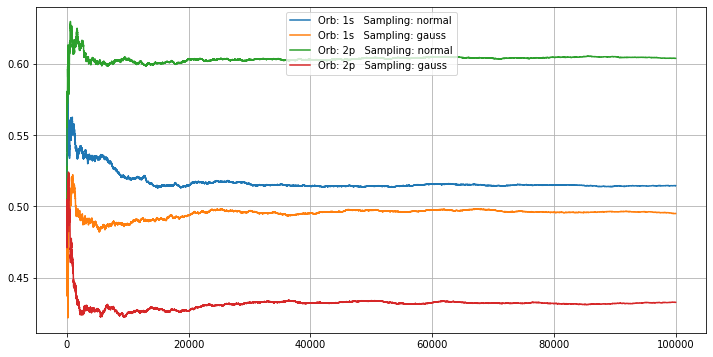

In [128]:
fig, ax = plt.subplots(figsize=(12,6))
for i1, config in enumerate(configs):
    for i2, s in enumerate(samplings):
        filename = f"results/{s}/acceptance_{config}.dat"
        y = np.loadtxt(filename,unpack=True)
        plt.plot(y,label=f"Orb: {config}   Sampling: {s}")
plt.grid(True)
plt.legend(loc="upper center")
plt.show()

Finally, the mean value of the distance of the quantum particle from the origin is shown as a function of the number of simulation steps for the two quantum states and for both the probability distributions.

results/normal/data_1s_0.dat
results/gauss/data_1s_0.dat
results/normal/data_2p_0.dat
results/gauss/data_2p_0.dat


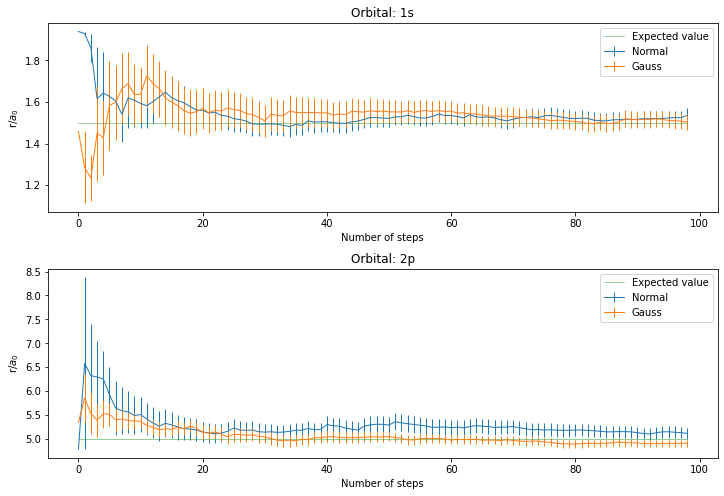

In [5]:
_max = 100
fig, ax = plt.subplots(2,1,figsize=(12,8), gridspec_kw={'hspace': 0.3})
for i1, config in enumerate(configs):
    ax[i1].set_title("Orbital: "+config)
    for i2, s in enumerate(samplings):
        filename = f"results/{s}/data_{config}_0.dat"
        print(filename)
        i, y, err = np.loadtxt(filename, unpack=True)
        i, y, err = i[1:_max], y[1:_max], err[1:_max]
        ax[i1].errorbar(i, y, yerr = err, label=s.capitalize(),linewidth=1)
    ax[i1].plot([expected_values[config] for index in range(len(i))],linewidth=0.5, label="Expected value")
    ax[i1].set_xlabel("Number of steps")
    ax[i1].set_ylabel("r/$a_0$")
    ax[i1].legend()

Only the first 100 steps have been shown in order to clearly see the difference in convergence between both probability distributions. As the graphs show, the averages for both distributions converge to the expected value of the mean distance from the origin, however, by sampling from a gaussian probability, one obtains a slightly faster convergence.